# Data Wringling and Exploratory Data Analysis (EDA)

* [1. Datasets](#1)
* [2. Store-related information](#2)
    * [2.1 Products](#2.1)
    * [2.2 Aisles](#2.2)
    * [2.3 Departments](#2.3)
    * [2.4 Aisles and departments with the highest number products](#2.4)
    * [2.5 Missing values](#2.5)
    * [2.6 Product numbering scheme](#2.6)
* [3. Customer-related information](#3)
    * [3.1 Orders](#3.1)
    * [3.2 Products in prior orders](#3.2)
    * [3.3 Products in future orders for model training](#3.3)
    * [3.4 Products in future orders for prediction](#3.4)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl # colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime as dt
import pickle

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.xmargin'] = 0.02
plt.rcParams['axes.ymargin'] = 0.1
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.bbox'] = 'tight'

#plt.rcParams['figure.figsize'] = (8.0, 10.0)

## 1. Datasets <a id='1'></a>

There are seven files related to this project, all downloaded from the [Kaggle Instacart competion site](https://www.kaggle.com/c/instacart-market-basket-analysis/data):

In [2]:
!ls -lrt data/*.csv

-rw-r--r-- 1 robertc robertc       270 May  1  2017 data/departments.csv
-rw-r--r-- 1 robertc robertc      2603 May  1  2017 data/aisles.csv
-rw-r--r-- 1 robertc robertc   2166953 May  1  2017 data/products.csv
-rw-r--r-- 1 robertc robertc  24680147 May  1  2017 data/order_products__train.csv
-rw-r--r-- 1 robertc robertc 108968645 May  1  2017 data/orders.csv
-rw-r--r-- 1 robertc robertc 577550706 May  1  2017 data/order_products__prior.csv
-rw-r--r-- 1 robertc robertc   1475693 Jun 20  2018 data/sample_submission.csv


Three of them contain store-related data (departments, aisles, products), while the remaining four files contain information on the customers' orders. 

Let's start with reading in the store-related data:

## 2. Store-related information <a id='2'></a>

In [3]:
p = pd.read_csv("./data/products.csv")
a = pd.read_csv("./data/aisles.csv")
d = pd.read_csv("./data/departments.csv")

p.shape, a.shape, d.shape

((49688, 4), (134, 2), (21, 2))

The store sells almost 50k products, organized in 134 aisles and 21 departments. 

Let's inspect the datasets now:

### 2.1 Products <a id='2.1'></a>

In [4]:
p.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


### 2.2 Aisles <a id='2.2'></a>

In [5]:
a.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


### 2.3 Departments <a id='2.3'></a>

In [6]:
d

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Good! This is a relational set of files with common columns (aisle_id, department_id), so we can merge them in one file using SQL-like joining in pandas.

### 2.4  Aisles and departments with the highest number products <a id='2.4'></a>

So let's merge the 3 files together to find the aisles and departments that offer the most products:

In [7]:
df = p.merge(a,on='aisle_id',how='left').merge(d,on='department_id',how='left').set_index('product_id')
df.shape

(49688, 5)

In [8]:
df.head(20)

,product_name,aisle_id,department_id,aisle,department
product_id,,,,,
1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
2,All-Seasons Salt,104,13,spices seasonings,pantry
3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
6,Dry Nose Oil,11,11,cold flu allergy,personal care
7,Pure Coconut Water With Orange,98,7,juice nectars,beverages
8,Cut Russet Potatoes Steam N' Mash,116,1,frozen produce,frozen
9,Light Strawberry Blueberry Yogurt,120,16,yogurt,dairy eggs


Was the merging successful?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 1 to 49688
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   49688 non-null  object
 1   aisle_id       49688 non-null  int64 
 2   department_id  49688 non-null  int64 
 3   aisle          49688 non-null  object
 4   department     49688 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


Yes. We have the same number of rows as in the original products.csv file, ad no null entries in any of the columns. 

What aisles and departments offer the highest number of products?

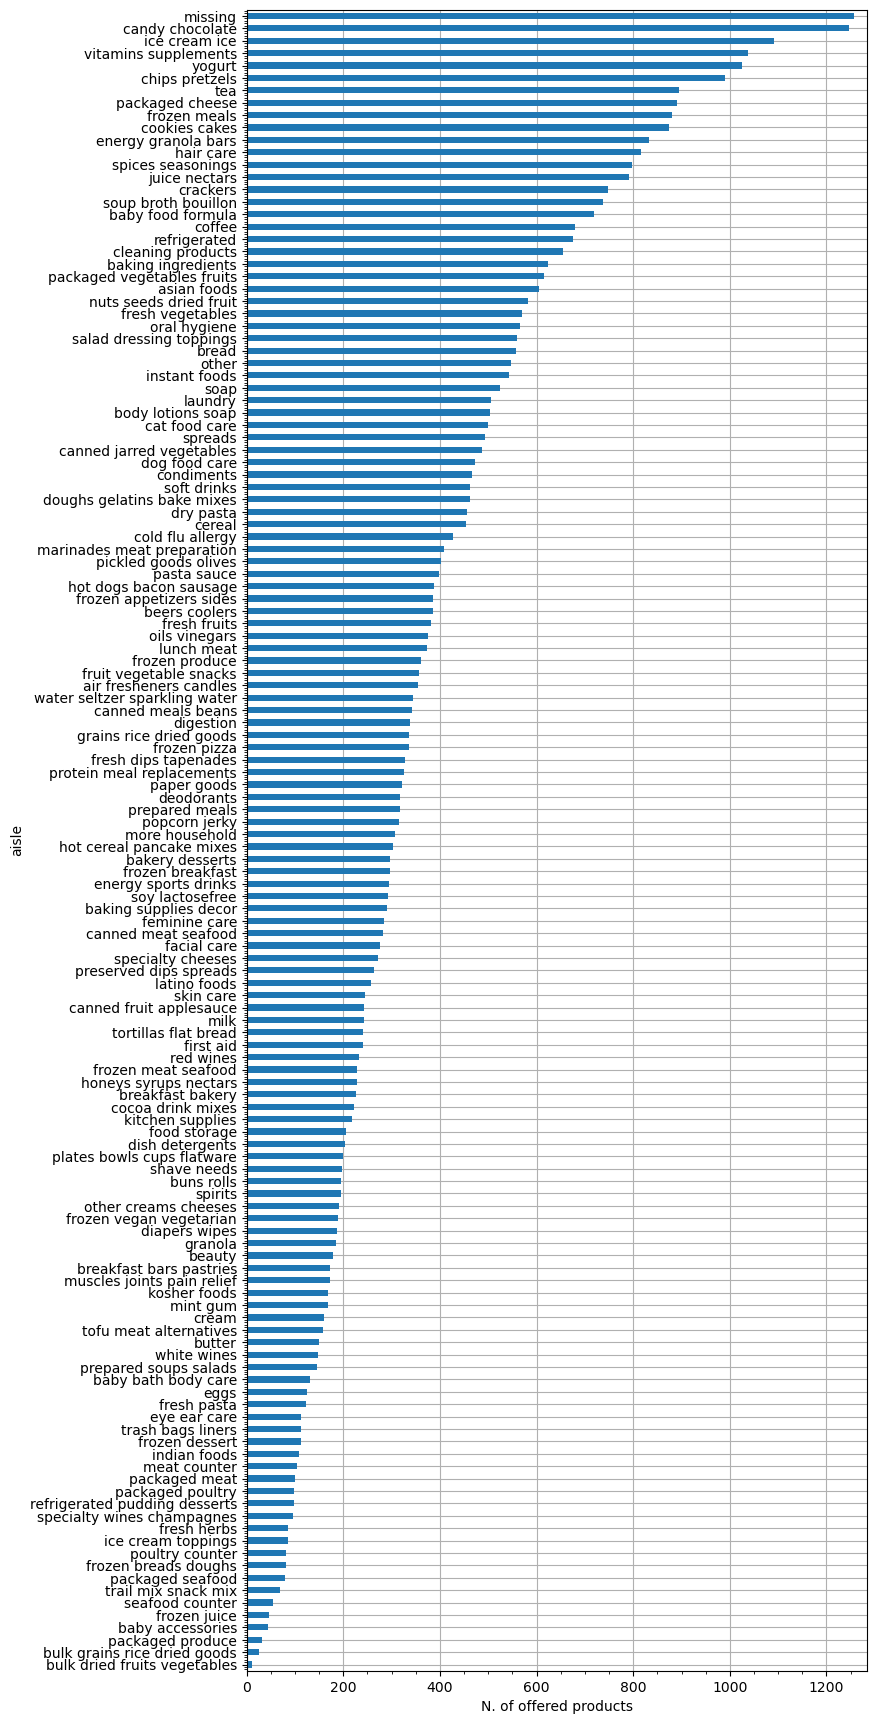

In [10]:
df.groupby('aisle')['product_name'].count().sort_values(ascending=True).plot.barh(figsize=(8,22))
plt.xlabel('N. of offered products');

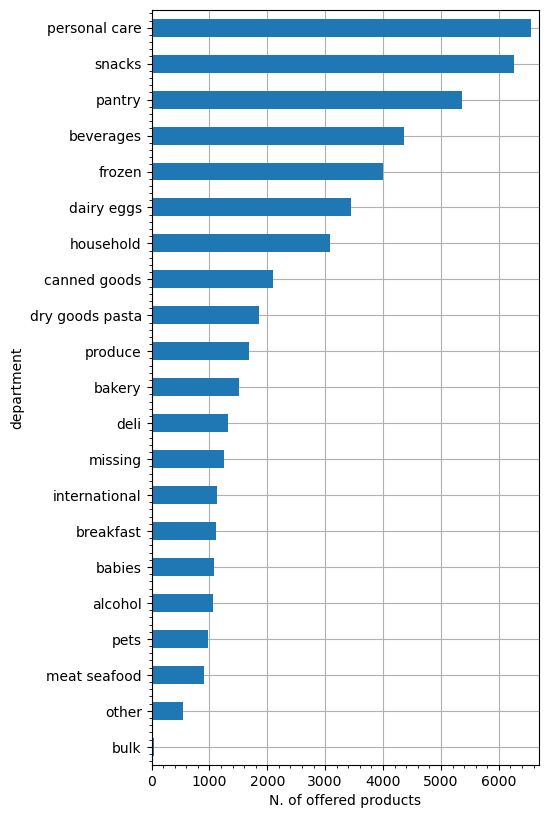

In [11]:
df.groupby('department')['product_name'].count().sort_values(ascending=True).plot.barh(figsize=(5,10))
plt.xlabel('N. of offered products');

### 2.5 Missing values <a id='2.5'></a>

About 1250 products appear in the aisle and the department called 'missing'. Does the 'missing' department automatically imply that the aisle info is 'missing' too? And vice-versa?: 

In [12]:
df[df['department'].str.contains('missing')]['aisle'].unique()

array(['missing'], dtype=object)

In [13]:
df[df['aisle'].str.contains('missing')]['department'].unique()

array(['missing'], dtype=object)

Yes, there's a one-to-one correspondence. OK, so what's the name of the products that correspond to those 'missing' entries:

In [14]:
df[df['department'].str.contains('missing')]['product_name'].head(20)

product_id
38                        Ultra Antibacterial Dish Liquid
72                              Organic Honeycrisp Apples
110                                Uncured Turkey Bologna
297     Write Bros Ball Point Pens, Cap-Pen, Medium (1...
417            Classics Baby Binks Easter Chocolate Bunny
437                   Strawberry Cheesecake Nonfat Yogurt
440                         Crossovers Olive Thyme Almond
472                               Fancy Diced Hot Chilies
491                                        Pompelmo Water
556                       Bake & Break Cheese Garlic Loaf
562                              Traditional Tartar Sauce
614       Plain Dairy-Free Probiotic Drinkable Cashewgurt
624                                          Chub Chorizo
690                          Vegetable Hearty Garden Soup
768                       Nacho Grain-Free Tortilla Chips
804                                           Ratatouille
891                     Liquid Water Enhance Ice Van Java
991

Food, vegetables, beverages, snacks, etc. , products all over the place. So, it seems like a random feature.

### 2.6 Product numbering scheme <a id='2.6'></a>

TODO: Not sure if we'll need it, but check if there is any correlation between the product_id, aisle_id and department_id numbering

## 3. Customer-related data <a id='3'></a>

The remaining 4 files contain the information about the customer orders. Let's read them in:

In [15]:
o = pd.read_csv("./data/orders.csv")
pp = pd.read_csv("./data/order_products__prior.csv")
pt = pd.read_csv("./data/order_products__train.csv")
ps = pd.read_csv("./data/sample_submission.csv")

print(o.shape)
print(pp.shape) 
print(pt.shape) 
print(ps.shape)

(3421083, 7)
(32434489, 4)
(1384617, 4)
(75000, 2)


1) The central dataset is in the **orders.csv** file (the *o* dataframe). It contains about 3.4M rows with order ids. There's one entry per order_id, and multiple order_id's per user. An important feature is in the *eval_set* column, which classifies an order as the prior order, the future order to be used in model training, and the future order for using in model testing. The task of this analysis is to predict the products that will be included in the future order from the test step.

2) The file **order_products__prior.csv** (the *pp* dataframe) contains information about the products which were included in prior orders. There can be more than one entries per order_id, corresponding to the number of products in that order.

3) The file **order_products__train.csv** (the *pt* dataframe) contain information about the products which are included in the future orders used for model testing, again, with more than one product per order_id.

4) The file **sample_submission.csv** (the *ps* datafrane) is a template file that contains order_id for which we  shall predict the product list. 

Let's inspect the files now:

### 3.1 Orders <a id='3.1'></a>

In [16]:
o.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [17]:
o.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                3421083 non-null  int64  
 1   user_id                 3421083 non-null  int64  
 2   eval_set                3421083 non-null  object 
 3   order_number            3421083 non-null  int64  
 4   order_dow               3421083 non-null  int64  
 5   order_hour_of_day       3421083 non-null  int64  
 6   days_since_prior_order  3214874 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


No missing values really, Nulls in days_since_prior_order correspond to the first order.

In [18]:
o['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

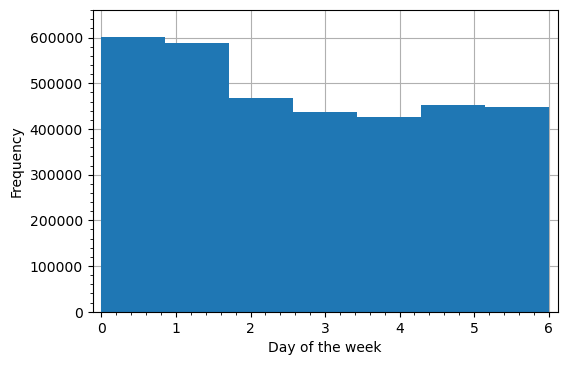

In [19]:
o['order_dow'].plot.hist(bins=7,range=(0,6))
plt.xlabel('Day of the week');

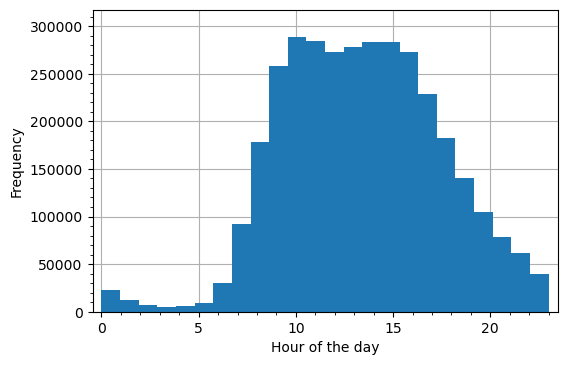

In [20]:
o['order_hour_of_day'].plot.hist(bins=24)
plt.xlabel('Hour of the day');

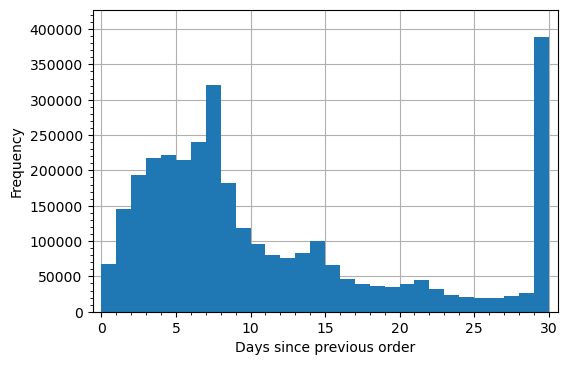

In [21]:
o['days_since_prior_order'].plot.hist(bins=30)
plt.xlabel('Days since previous order');

7, 14, 21, 30 - automatic recurring orders?

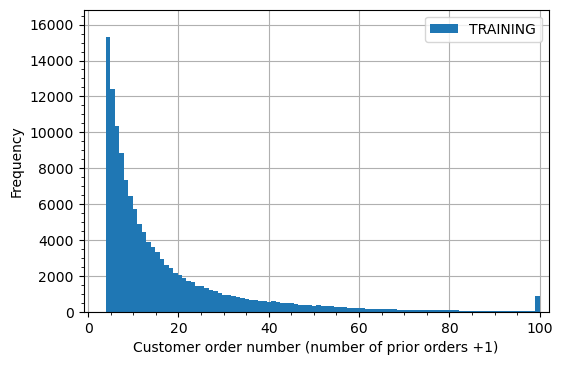

In [22]:
o[o['eval_set']=='train']['order_number'].plot.hist(bins=100,range=(1,100))
plt.xlabel("Customer order number (number of prior orders +1)")
plt.legend(['TRAINING']);

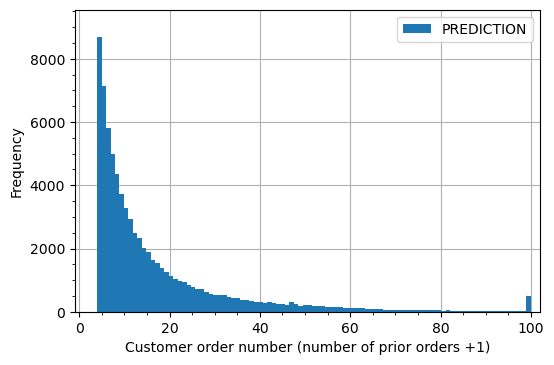

In [23]:
o[o['eval_set']=='test']['order_number'].plot.hist(bins=100,range=(1,100))
plt.xlabel("Customer order number (number of prior orders +1)")
plt.legend(['PREDICTION']);

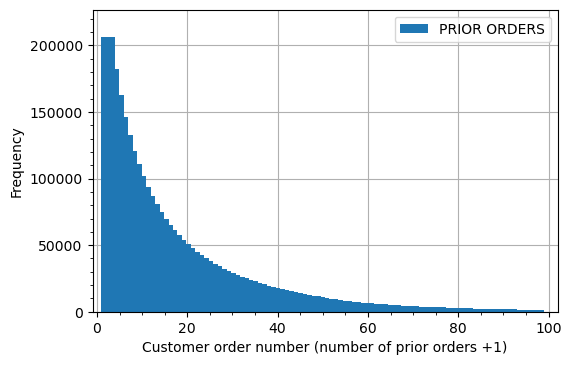

In [24]:
o[o['eval_set']=='prior']['order_number'].plot.hist(bins=100,range=(1,100))
plt.xlabel("Customer order number (number of prior orders +1)");
plt.legend(['PRIOR ORDERS']);

Last three plots: the future order (training, prediction) start from 4, the prior orders start from 1. A cut off at 100 orders.

### 3.2 Products in prior orders <a id='3.2'></a>

In [25]:
pp.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


How many products in each order?

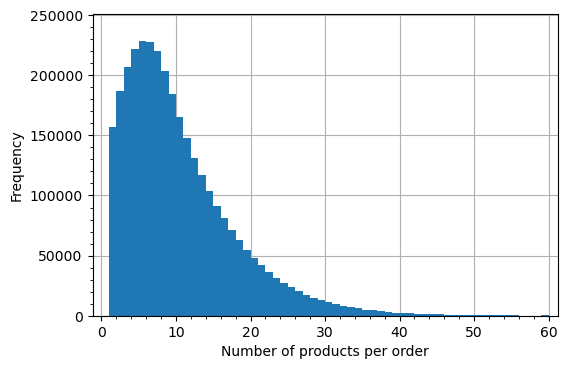

In [26]:
pp.groupby('order_id')['add_to_cart_order'].max().plot.hist(bins=60,range=(0,60))#logy=True);
plt.xlabel("Number of products per order");

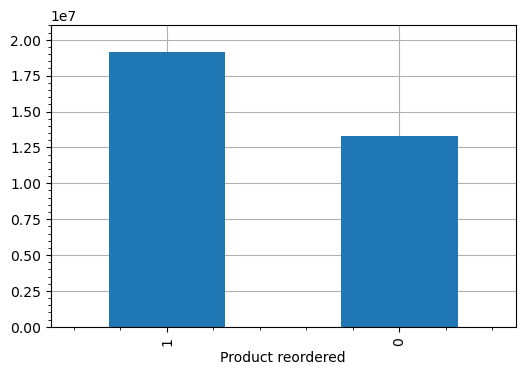

In [27]:
pp['reordered'].value_counts().plot(kind='bar')
plt.xlabel("Product reordered");

### 3.3 Products in future orders for model training <a id='3.3'></a>

In [28]:
pt.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


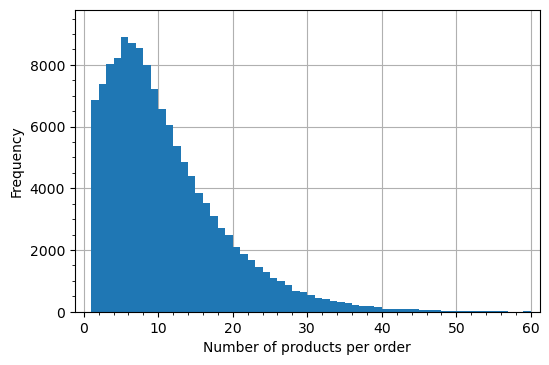

In [29]:
pt.groupby('order_id')['add_to_cart_order'].max().plot.hist(bins=60,range=(0,60))#logy=True);
plt.xlabel("Number of products per order");

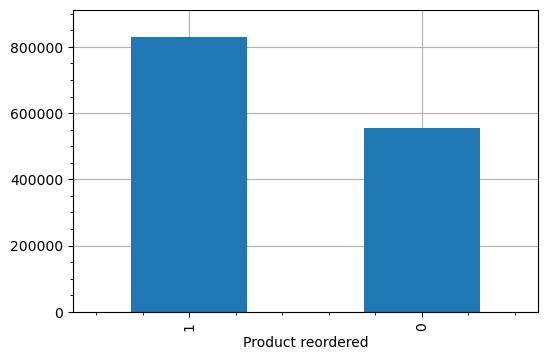

In [30]:
pt['reordered'].value_counts().plot(kind='bar')
plt.xlabel("Product reordered");

### 3.4 Products in future orders for prediction <a id='3.4'></a>

In [31]:
ps.head(10)

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259
5,313,39276 29259
6,353,39276 29259
7,386,39276 29259
8,414,39276 29259
9,418,39276 29259


Are the files cosistent? Are we getting the same order_id sequence directly from the orders file for the 'test' subset?

In [32]:
o[o['eval_set']=='test'].sort_values(by='order_id').head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
611292,17,36855,test,5,6,15,1.0
584613,34,35220,test,20,3,11,8.0
3102779,137,187107,test,9,2,19,30.0
1929637,182,115892,test,28,0,11,8.0
590591,257,35581,test,9,6,23,5.0
1888538,313,113359,test,31,6,22,7.0
2880687,353,173814,test,4,4,13,30.0
924638,386,55492,test,8,0,15,30.0
2009806,414,120775,test,18,5,14,8.0
556925,418,33565,test,12,0,12,14.0


Seem yes.